<a href="https://colab.research.google.com/github/anmol-singh7/GenAI-Exploration/blob/main/Text_to_Image_generation_with_LLM_with_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Text-to-Image Generation using Stable Diffusion and Diffusers

In [3]:
#diffuser is a hugging face page for using diffusion models from huuggingface hub
!pip install -q diffusers transformers accelerate

In [4]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
# multi model both nlp and cv  as we give text and generate image
model_id1 ="dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

In [6]:
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensor=True)
pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

Keyword arguments {'use_safetensor': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "dreamlike-art/dreamlike-diffusion-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": null,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [7]:
prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
         extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans, In style of by Jordan Grimmer and greg
         rutkowski, crisp lines and color, complex background, particles, lines, wind, concept art, sharp focus, vivid colors"""


In [8]:
image = pipe(prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (84 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['art, sharp focus, vivid colors']


  0%|          | 0/50 [00:00<?, ?it/s]

(-0.5, 639.5, 639.5, -0.5)

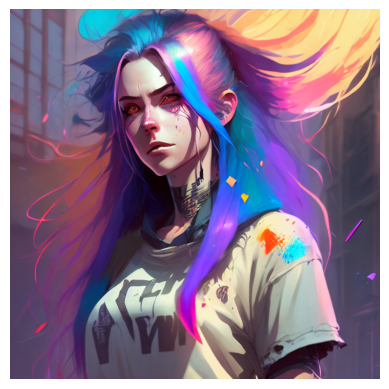

In [9]:
plt.imshow(image)
plt.axis("off")

In [29]:
prompt ="""a  boy sitting on a chair accompained by a tiger make it cineamatic"""

In [30]:

image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

(-0.5, 639.5, 639.5, -0.5)

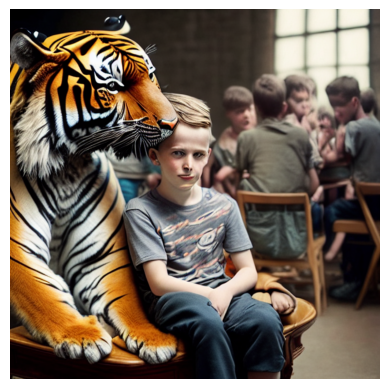

In [31]:
plt.imshow(image)
plt.axis("off")

### Working with Stable Diffusion parameters


* Negative prompting
* num_inference_steps
* height
* width
* num_images_per_prompt

In [11]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt,**params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis("off")
  else:
    fig = plt.figure()
    plt.imshow(img[0])
    plt.axis("off")
  plt.tight_layout()
  plt.show()

In [12]:
prompt = """dreamlikeart,  beautiful girl playing the festival of colors, drapes in traditionsl Indain attires, throwing colors"""

In [13]:
params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

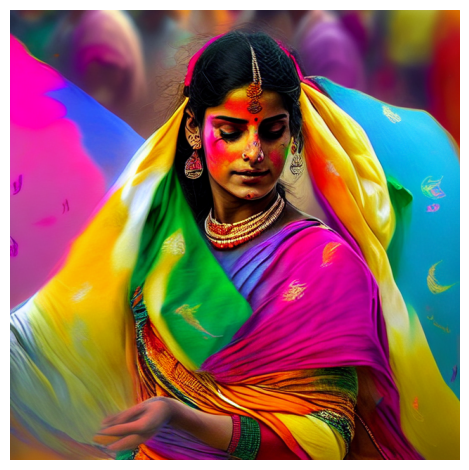

In [14]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

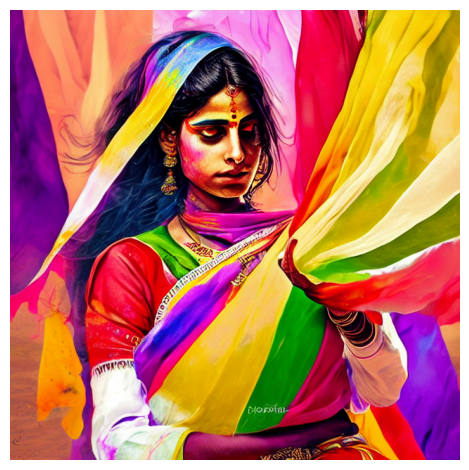

In [15]:
params = {"num_inference_steps":100}
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

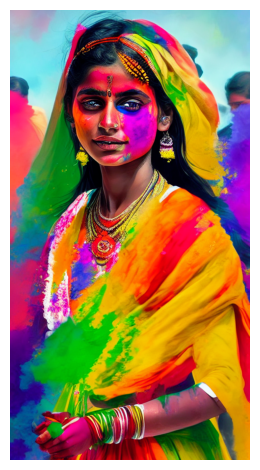

In [17]:
#height width
params = {"num_inference_steps":100, "width":512, "height":int(1.5*640)}

generate_image(pipe,prompt, params)

  0%|          | 0/50 [00:00<?, ?it/s]

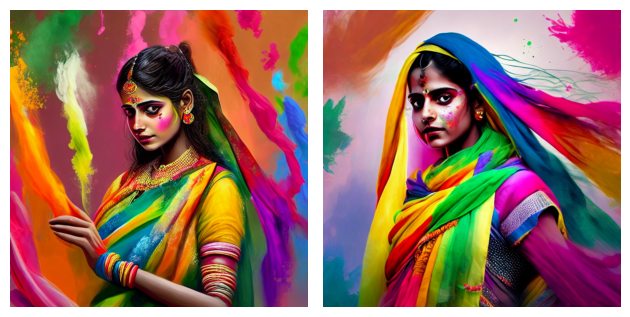

In [19]:
#num_image)per_prompt
params = {"num_interface-steps":100, "num_images_per_prompt":2 }

generate_image(pipe,prompt,params)

  0%|          | 0/50 [00:00<?, ?it/s]

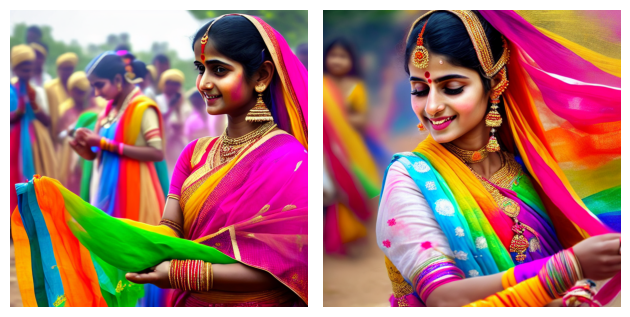

In [21]:
#num_image)per_prompt
params = {"num_interface_steps":100, "num_images_per_prompt":2, "negative_prompt":"ugly, distorted, low quality" }

generate_image(pipe,prompt,params)